In [2]:
import pandas as pd

# Load the dataset to inspect its structure
data = pd.read_csv("Combined Data.csv")

# Display the first few rows and basic information about the dataset
data_info = data.info()
data_head = data.head()

data_info, data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53043 entries, 0 to 53042
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  53043 non-null  int64 
 1   statement   52681 non-null  object
 2   status      53043 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


(None,
    Unnamed: 0                                          statement   status
 0           0                                         oh my gosh  Anxiety
 1           1  trouble sleeping, confused mind, restless hear...  Anxiety
 2           2  All wrong, back off dear, forward doubt. Stay ...  Anxiety
 3           3  I've shifted my focus to something else but I'...  Anxiety
 4           4  I'm restless and restless, it's been a month n...  Anxiety)

In [3]:
data.head()

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety


In [4]:
data = data.drop(['Unnamed: 0'], axis=1)

In [5]:
data

,statement,status
0,oh my gosh,Anxiety
1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,I've shifted my focus to something else but I'...,Anxiety
4,"I'm restless and restless, it's been a month n...",Anxiety
...,...,...
53038,Nobody takes me seriously I’ve (24M) dealt wit...,Anxiety
53039,"selfishness ""I don't feel very good, it's lik...",Anxiety
53040,Is there any way to sleep better? I can't slee...,Anxiety
53041,"Public speaking tips? Hi, all. I have to give ...",Anxiety


In [6]:
data.describe()

,statement,status
count,52681,53043
unique,51073,7
top,what do you mean?,Normal
freq,22,16351


In [7]:
data.isnull().sum()

statement    362
status         0
dtype: int64

In [8]:
data.dropna(inplace = True)
data.isna().sum()


statement    0
status       0
dtype: int64

In [9]:
import matplotlib.pyplot as plt

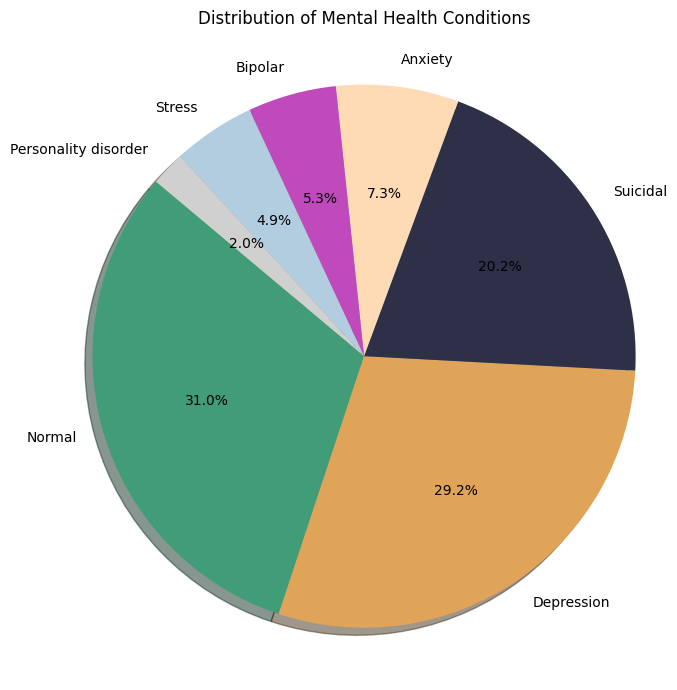

In [10]:
# Count the occurrences of each category
status_counts = data['status'].value_counts()

# Define colors for each category (7 colors)
colors = ['#419D78', '#E0A458', '#2D3047', '#FFDBB5', '#C04ABC', '#B3CDE0', '#D0D0D0']

# Create the pie chart
plt.figure(figsize=(7, 7))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', 
        startangle=140, colors=colors, shadow=True)

plt.title('Distribution of Mental Health Conditions')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.

# Display the chart
plt.tight_layout()
plt.show()

# Lowercasing


In [11]:
data.rename(columns={'statement': 'original_statement'}, inplace=True)  

data['statement']=data['original_statement'].str.lower()
data.head()

,original_statement,status,statement
0,oh my gosh,Anxiety,oh my gosh
1,"trouble sleeping, confused mind, restless hear...",Anxiety,"trouble sleeping, confused mind, restless hear..."
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,"all wrong, back off dear, forward doubt. stay ..."
3,I've shifted my focus to something else but I'...,Anxiety,i've shifted my focus to something else but i'...
4,"I'm restless and restless, it's been a month n...",Anxiety,"i'm restless and restless, it's been a month n..."


# Define a Function for Text Preprocessing

In [12]:
import re
def remove_patterns(text):
    # Remove URLs
    text = re.sub(r'http[s]?://\S+', '', text)
    # Remove markdown-style links
    text = re.sub(r'\[.*?\]\(.*?\)', '', text)
    # Remove handles (that start with '@')
    text = re.sub(r'@\w+', '', text)
    # Remove punctuation and other special characters
    text = re.sub(r'[^\w\s]', '', text)
    return text.strip()


# Testing the function weather it is working good or not

In [13]:
# Example usage
example_text = "I'm feeling anxious and restless, it's been a tough week!"
example_output = remove_patterns(example_text)
print(example_output)

Im feeling anxious and restless its been a tough week


# applying function to data

In [14]:
# Apply the function to the 'statement' column
data['statement'] = data['statement'].apply(remove_patterns)
data.head()

,original_statement,status,statement
0,oh my gosh,Anxiety,oh my gosh
1,"trouble sleeping, confused mind, restless hear...",Anxiety,trouble sleeping confused mind restless heart ...
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,all wrong back off dear forward doubt stay in ...
3,I've shifted my focus to something else but I'...,Anxiety,ive shifted my focus to something else but im ...
4,"I'm restless and restless, it's been a month n...",Anxiety,im restless and restless its been a month now ...


# Applying Tokenization

In [15]:
pip install --upgrade nltk

Note: you may need to restart the kernel to use updated packages.


In [16]:
#nltk.download()

In [17]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [18]:
from nltk.tokenize import word_tokenize

In [19]:
data['tokens'] = data['statement'].apply(word_tokenize)
data.head()


,original_statement,status,statement,tokens
0,oh my gosh,Anxiety,oh my gosh,"[oh, my, gosh]"
1,"trouble sleeping, confused mind, restless hear...",Anxiety,trouble sleeping confused mind restless heart ...,"[trouble, sleeping, confused, mind, restless, ..."
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,all wrong back off dear forward doubt stay in ...,"[all, wrong, back, off, dear, forward, doubt, ..."
3,I've shifted my focus to something else but I'...,Anxiety,ive shifted my focus to something else but im ...,"[ive, shifted, my, focus, to, something, else,..."
4,"I'm restless and restless, it's been a month n...",Anxiety,im restless and restless its been a month now ...,"[im, restless, and, restless, its, been, a, mo..."


# Stemming

In [20]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

# Add stemming to the process
def stem_tokens(tokens):
    return [stemmer.stem(token) for token in tokens]

data['stemmed_tokens'] = data['tokens'].apply(stem_tokens)


In [21]:
data

,original_statement,status,statement,tokens,stemmed_tokens
0,oh my gosh,Anxiety,oh my gosh,"[oh, my, gosh]","[oh, my, gosh]"
1,"trouble sleeping, confused mind, restless hear...",Anxiety,trouble sleeping confused mind restless heart ...,"[trouble, sleeping, confused, mind, restless, ...","[troubl, sleep, confus, mind, restless, heart,..."
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,all wrong back off dear forward doubt stay in ...,"[all, wrong, back, off, dear, forward, doubt, ...","[all, wrong, back, off, dear, forward, doubt, ..."
3,I've shifted my focus to something else but I'...,Anxiety,ive shifted my focus to something else but im ...,"[ive, shifted, my, focus, to, something, else,...","[ive, shift, my, focu, to, someth, els, but, i..."
4,"I'm restless and restless, it's been a month n...",Anxiety,im restless and restless its been a month now ...,"[im, restless, and, restless, its, been, a, mo...","[im, restless, and, restless, it, been, a, mon..."
...,...,...,...,...,...
53038,Nobody takes me seriously I’ve (24M) dealt wit...,Anxiety,nobody takes me seriously ive 24m dealt with d...,"[nobody, takes, me, seriously, ive, 24m, dealt...","[nobodi, take, me, serious, ive, 24m, dealt, w..."
53039,"selfishness ""I don't feel very good, it's lik...",Anxiety,selfishness i dont feel very good its like i ...,"[selfishness, i, dont, feel, very, good, its, ...","[selfish, i, dont, feel, veri, good, it, like,..."
53040,Is there any way to sleep better? I can't slee...,Anxiety,is there any way to sleep better i cant sleep ...,"[is, there, any, way, to, sleep, better, i, ca...","[is, there, ani, way, to, sleep, better, i, ca..."
53041,"Public speaking tips? Hi, all. I have to give ...",Anxiety,public speaking tips hi all i have to give a p...,"[public, speaking, tips, hi, all, i, have, to,...","[public, speak, tip, hi, all, i, have, to, giv..."


# Text Vectorization

# 1. Count Vectorizer

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the cleaned tokens (need to join tokens into text again)
X_count = vectorizer.fit_transform(data['tokens'].apply(lambda x: ' '.join(x)))

# View the shape of the resulting vectorized data
print(X_count.shape)


(52681, 77288)


# 2. TF-IDF Vectorizer

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the cleaned tokens
X_tfidf = tfidf_vectorizer.fit_transform(data['tokens'].apply(lambda x: ' '.join(x)))

# View the shape of the resulting vectorized data
print(X_tfidf.shape)


(52681, 77288)


# Encoding the Target Variable

In [35]:
from sklearn.preprocessing import LabelEncoder
import joblib

# Initialize label encoder
label_encoder = LabelEncoder()

# Encode the 'status' column (target variable)
y = label_encoder.fit_transform(data['status'])

# Save the label encoder
joblib.dump(label_encoder, 'D:/smart, project-3/flask/models/label_encoder.pkl')

# Initialize the XGBoost Classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Train the model on the training data
xgb_model.fit(X_train, y_train)

# Save the trained model
joblib.dump(xgb_model, 'D:/smart, project-3/flask/models/sentiment_analysis_xgb_model.pkl')


C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\xgboost\core.py:158: UserWarning: [16:30:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


['D:/smart, project-3/flask/models/sentiment_analysis_xgb_model.pkl']

#  Train-Test Split


In [31]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# View the shapes of the training and testing sets
print(X_train.shape, X_test.shape)


(42144, 77288) (10537, 77288)


# Model Selection and Training

# Naive Bayes Classifier


In [26]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize the model
nb_model = MultinomialNB()

# Train the model
nb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = nb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)


Accuracy: 0.46436367087406283
Classification Report:
                      precision    recall  f1-score   support

             Anxiety       0.97      0.04      0.07       755
             Bipolar       0.50      0.00      0.01       527
          Depression       0.35      0.98      0.51      3016
              Normal       0.94      0.53      0.68      3308
Personality disorder       0.00      0.00      0.00       237
              Stress       0.00      0.00      0.00       536
            Suicidal       0.82      0.07      0.12      2158

            accuracy                           0.46     10537
           macro avg       0.51      0.23      0.20     10537
        weighted avg       0.66      0.46      0.39     10537



C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1471: Undefin

# Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_lr = lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f'Logistic Regression Accuracy: {accuracy_lr}')


Logistic Regression Accuracy: 0.7751731992028091


C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


# XGBoost Model

In [32]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Initialize the XGBoost Classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Train the model on the training data
xgb_model.fit(X_train, y_train)

# Predict on the test data
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
report_xgb = classification_report(y_test, y_pred_xgb)

print(f'XGBoost Accuracy: {accuracy_xgb}')
print('Classification Report:')
print(report_xgb)


C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\xgboost\core.py:158: UserWarning: [16:23:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.7871310619720984
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.81      0.83       755
           1       0.88      0.79      0.83       527
           2       0.72      0.75      0.74      3016
           3       0.88      0.94      0.91      3308
           4       0.90      0.61      0.73       237
           5       0.68      0.61      0.64       536
           6       0.70      0.66      0.68      2158

    accuracy                           0.79     10537
   macro avg       0.80      0.74      0.76     10537
weighted avg       0.79      0.79      0.78     10537



In [33]:
models = pd.DataFrame({
                      "Models": ['xgboost','LogisticRegression','MultinomialNB'],
                      "Scores": [accuracy_xgb,accuracy_lr,accuracy]
})
models

,Models,Scores
0,xgboost,0.787131
1,LogisticRegression,0.775173
2,MultinomialNB,0.464364


#  Save the Trained XGBoost Model

In [36]:
import joblib

# Save the XGBoost model
joblib.dump(xgb_model, 'sentiment_analysis_xgb_model.pkl')

# Save the TF-IDF vectorizer
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import random
from imblearn.over_sampling import RandomOverSampler
from scipy.sparse import hstack  # To combine sparse matrices
from wordcloud import WordCloud

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")